In [38]:
from obspy.io.segy.segy import _read_segy
folder=r"D:\SoftwareWebApps\Python\geophysics\inversion&spect_decomp\d11_data\\"
# stream = _read_segy(folder+'cropped_4_spect_decomp.sgy', headonly=True)
import segyio

In [152]:
path=folder+'cropped_4_spect_decomp.sgy'
f = segyio.open(path)
x = segyio.tools.collect(f.trace[:])
# x = x.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
# np.all(x == segyio.tools.cube(f))
# # with segyio.open(path, "r") as f:
# #     x = segyio.tools.collect(f.traces[:])
# #     print(f.ilines)
# # dir(f)
x.shape,len(f.ilines), len(f.xlines),f.samples

((52461, 41),
 261,
 201,
 array([ 1720.,  1722.,  1724.,  1726.,  1728.,  1730.,  1732.,  1734.,
         1736.,  1738.,  1740.,  1742.,  1744.,  1746.,  1748.,  1750.,
         1752.,  1754.,  1756.,  1758.,  1760.,  1762.,  1764.,  1766.,
         1768.,  1770.,  1772.,  1774.,  1776.,  1778.,  1780.,  1782.,
         1784.,  1786.,  1788.,  1790.,  1792.,  1794.,  1796.,  1798.,
         1800.]))

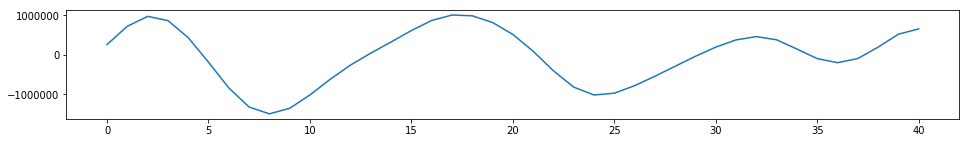

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
one_trace = stream.traces[0]

plt.figure(figsize=(16,2))
plt.plot(one_trace.data)
plt.show()

In [21]:
# data = np.stack(t.data for t in stream.traces[0:100])
# data.shape

(100, 41)

In [70]:
vm = np.percentile(data, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

The 99th percentile is 8153988; the max amplitude is 17386418


In [132]:
# plt.imshow(mdata.T, cmap="Greys", vmin=-vm, vmax=vm, aspect='auto')

In [143]:
# plt.figure(figsize=(18,6))
# plt.imshow(mdata.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
# plt.colorbar()
# plt.show()

In [61]:
import bruges

In [116]:
# dt = stream.traces[0].header.sample_interval_in_ms_for_this_trace / 1e6
# similarity = bruges.attribute.similarity(data, duration=0.16, dt=dt)
# sd=bruges.attribute.spectraldecomp(data, f=(10,20,30,40,50),window_length=0.030,dt=dt,kt=8)

TypeError: spectraldecomp() got an unexpected keyword argument 'kt'

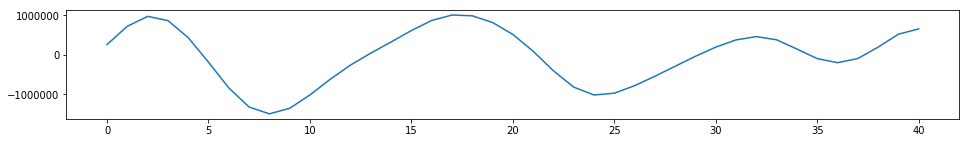

In [124]:
mdata[0:2,:]
plt.figure(figsize=(16,2))
plt.plot(mdata.T[:,0])
plt.show()

In [141]:
# x2 = x.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
# for il in range(len(f.ilines)):
#     mdata=x2[il,:,:]
#     break
# extra_samples=7
# mdd=np.append(np.append(np.zeros((mdata.shape[0],extra_samples)),mdata[:,:], axis=1),np.zeros((mdata.shape[0],extra_samples)), axis=1)
# msd=bruges.attribute.spectraldecomp(mdd.T, f=(10,20,30,40,50),window_length=0.030,dt=dt)
# mdata.shape,mdd.shape,msd.shape

((201, 41), (201, 55), (41, 201, 5))

In [145]:
extra_samples=7
data=np.append(np.append(np.zeros((x.shape[0],extra_samples)),x[:,:], axis=1),np.zeros((x.shape[0],extra_samples)), axis=1)
sd=bruges.attribute.spectraldecomp(data.T, f=(10,20,30,40,50),window_length=0.030,dt=dt)
x.shape,data.shape,sd.shape,len(f.ilines), len(f.xlines),f.samples

((52461, 41),
 (52461, 55),
 (41, 52461, 5),
 261,
 201,
 array([ 1720.,  1722.,  1724.,  1726.,  1728.,  1730.,  1732.,  1734.,
         1736.,  1738.,  1740.,  1742.,  1744.,  1746.,  1748.,  1750.,
         1752.,  1754.,  1756.,  1758.,  1760.,  1762.,  1764.,  1766.,
         1768.,  1770.,  1772.,  1774.,  1776.,  1778.,  1780.,  1782.,
         1784.,  1786.,  1788.,  1790.,  1792.,  1794.,  1796.,  1798.,
         1800.]))

In [150]:
dir(f.header)
f.text[0]

bytearray(b'C 1 SEGY OUTPUT FROM Petrel 2018.2 Friday, June 07 2019 18:57:48                C 2 Name: NEC-OSN-97_2_NORTH.sgy \xd5Realized\xe5 1 \xd5Crop\xe5 2 Type: 3D seismic         C 3                                                                             C 4 First inline: 1760   Last inline: 2020                                      C 5 First xline:  2870   Last xline:  3070                                      C 6 CRS: WGS_1984_UTM_Zone_45N \xd5EPSG,32645\xe5                                     C 7 X min: 591253.98 max: 596895.68 delta: 5641.70                              C 8 Y min: 2290619.69 max: 2297462.51 delta: 6842.82                            C 9 Time min: -1801.00 max: -1719.00 delta: 82.00                               C10 Lat min: ~20.71260504 max: ~20.77471322 delta: ~0.06210818                  C11 Long min: ~87.87635238 max: ~87.93090503 delta: ~0.05455265                 C12 Trace min: -1800.00 max: -1720.00 delta: 80.00                              C13 Seismi

In [151]:
dstpath=folder+'cropped_4_spect_decomp_f10.sgy'
spec = segyio.tools.metadata(f)
# spec.samples = spec.samples[:len(spec.samples) - 50]
with segyio.create(dstpath, spec) as dst:
    dst.text[0] = f.text[0]
    dst.bin = f.bin
    dst.header = f.header
    dst.trace = sd[:,:,0].T

C:\Users\Arun\Anaconda3\Lib\site-packages\segyio\utils.py:18: RuntimeWarning: Implicit conversion to contiguous array
  warnings.warn(msg, RuntimeWarning)
C:\Users\Arun\Anaconda3\Lib\site-packages\segyio\utils.py:23: RuntimeWarning: Implicit conversion from float64 to float32 (narrowing)
  warnings.warn(msg.format(x.dtype, dtype), RuntimeWarning)


In [82]:
# sd[:,:,0]
# (52461, 41)
# for i in range(sd.shape[2]):
#     sf=sd[:,:,i].T
#     sf = sf.reshape((len(f.ilines), len(f.xlines), len(f.samples)))
#     break
data.shape,sd.shape,len(f.ilines), len(f.xlines),f.samples

((52461, 41),
 (52447, 41, 5),
 261,
 201,
 array([ 1720.,  1722.,  1724.,  1726.,  1728.,  1730.,  1732.,  1734.,
         1736.,  1738.,  1740.,  1742.,  1744.,  1746.,  1748.,  1750.,
         1752.,  1754.,  1756.,  1758.,  1760.,  1762.,  1764.,  1766.,
         1768.,  1770.,  1772.,  1774.,  1776.,  1778.,  1780.,  1782.,
         1784.,  1786.,  1788.,  1790.,  1792.,  1794.,  1796.,  1798.,
         1800.]))

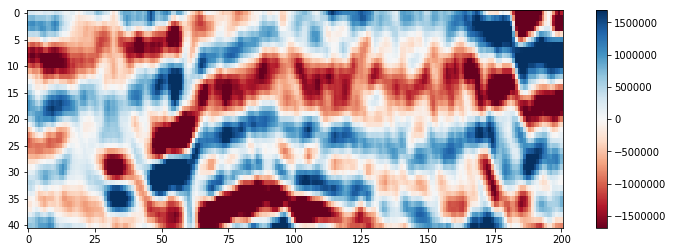

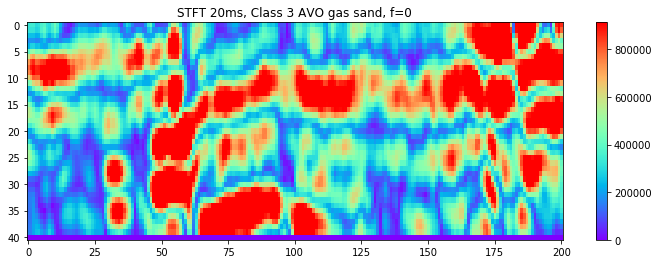

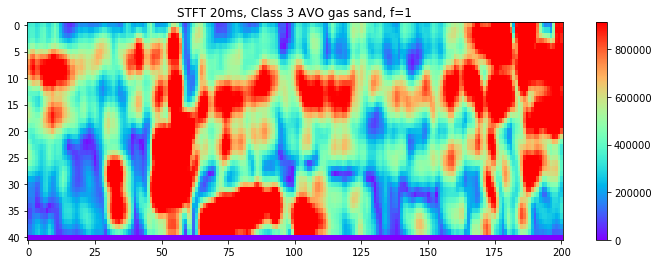

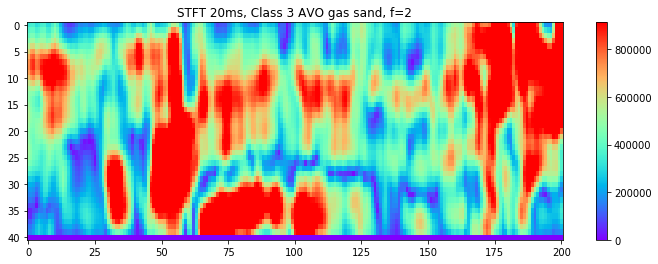

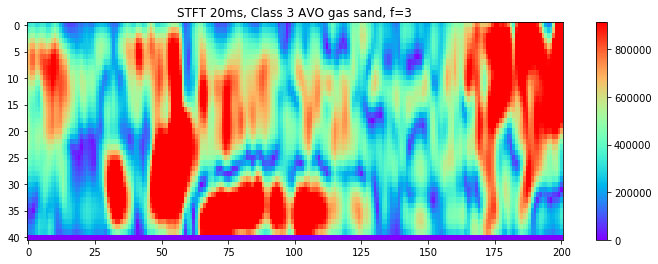

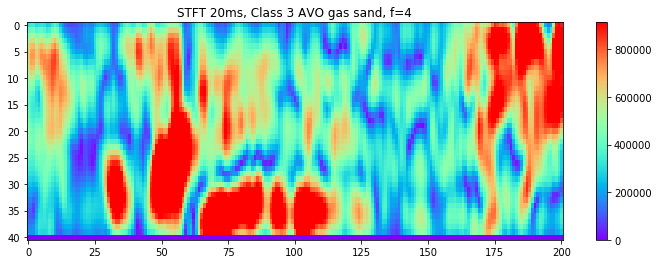

In [142]:
plt.figure(figsize=(12,4))
plt.imshow(mdata.T, cmap="RdBu", vmin=-vm, vmax=vm, aspect='auto')
plt.colorbar()
plt.show()
for i in range(sd.shape[2]):
#     plt.figure(figsize=(7,5))
#     plt.imshow(sd[:,:,i].T,aspect='auto',interpolation='bilinear',cmap='rainbow')
#     plt.clim(0,914000.225)
#     plt.title('STFT 20ms, Class 3 AVO gas sand, f='+str(i)), plt.colorbar()
    vm = np.percentile(msd[:,:,i], 99)
    plt.figure(figsize=(12,4))
    plt.imshow(msd[:,:,i], cmap='rainbow', vmin=-vm, vmax=vm, aspect='auto')
    plt.clim(0,914000.225)
    plt.title('STFT 20ms, Class 3 AVO gas sand, f='+str(i)), plt.colorbar()
#     plt.colorbar()
    plt.show()

In [19]:
# plt.figure(figsize=(16,8))
# plt.imshow(similarity.T, cmap="viridis", aspect='auto')
# plt.colorbar()
# plt.show()

In [15]:
out = Stream(Trace(t, header=dict(delta=dt)) for t in similarity)

In [17]:
out.stats = Stats(dict(textual_file_header=stream.textual_file_header[:800]))
out.stats.textual_file_header += """Similarity volume.
Generated: 18 Sep 2016 by Matt Hall matt@agilegeoscience.com.
Algorithm: github.com/agile-geoscience/bruges.attribute.similarity.
Parameters: duration=0.16 s, dt=0.008 s.""".encode('utf-8')